# English Premier League (EPL) Pythagorean Predictor

## Step 1

In [3]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18.columns.tolist())

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


## Step 2

In [5]:
EPL18

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20170811,Arsenal,Leicester,4,3,H
1,20170812,Brighton,Man City,0,2,A
2,20170812,Chelsea,Burnley,2,3,A
3,20170812,Crystal Palace,Huddersfield,0,3,A
4,20170812,Everton,Stoke,1,0,H
5,20170812,Southampton,Swansea,0,0,D
6,20170812,Watford,Liverpool,3,3,D
7,20170812,West Brom,Bournemouth,1,0,H
8,20170813,Man United,West Ham,4,0,H
9,20170813,Newcastle,Tottenham,0,2,A


In [8]:
EPL18['hwinvalue'] = np.where(EPL18['FTR'] == 'H', 1, np.where(EPL18['FTR'] == 'D', 0.5, 0))
EPL18['awinvalue'] = np.where(EPL18['FTR'] == 'A', 1, np.where(EPL18['FTR'] == 'D', 0.5, 0))
EPL18['count'] = 1
EPL18

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hwinvalue,awinvalue,count
0,20170811,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,20170812,Brighton,Man City,0,2,A,0.0,1.0,1
2,20170812,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,20170812,Everton,Stoke,1,0,H,1.0,0.0,1
5,20170812,Southampton,Swansea,0,0,D,0.5,0.5,1
6,20170812,Watford,Liverpool,3,3,D,0.5,0.5,1
7,20170812,West Brom,Bournemouth,1,0,H,1.0,0.0,1
8,20170813,Man United,West Ham,4,0,H,1.0,0.0,1
9,20170813,Newcastle,Tottenham,0,2,A,0.0,1.0,1


## Step 3

In [10]:
Games_2017 = EPL18[EPL18.Date < 20180000]
Games_2017
#This gives the games played in the 2017 season 

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hwinvalue,awinvalue,count
0,20170811,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,20170812,Brighton,Man City,0,2,A,0.0,1.0,1
2,20170812,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,20170812,Everton,Stoke,1,0,H,1.0,0.0,1
5,20170812,Southampton,Swansea,0,0,D,0.5,0.5,1
6,20170812,Watford,Liverpool,3,3,D,0.5,0.5,1
7,20170812,West Brom,Bournemouth,1,0,H,1.0,0.0,1
8,20170813,Man United,West Ham,4,0,H,1.0,0.0,1
9,20170813,Newcastle,Tottenham,0,2,A,0.0,1.0,1


In [12]:
Games_2018 = EPL18[EPL18.Date > 20180000]
Games_2018 

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hwinvalue,awinvalue,count
209,20180101,Brighton,Bournemouth,2,2,D,0.5,0.5,1
210,20180101,Burnley,Liverpool,1,2,A,0.0,1.0,1
211,20180101,Everton,Man United,0,2,A,0.0,1.0,1
212,20180101,Leicester,Huddersfield,3,0,H,1.0,0.0,1
213,20180101,Stoke,Newcastle,0,1,A,0.0,1.0,1
214,20180102,Man City,Watford,3,1,H,1.0,0.0,1
215,20180102,Southampton,Crystal Palace,1,2,A,0.0,1.0,1
216,20180102,Swansea,Tottenham,0,2,A,0.0,1.0,1
217,20180102,West Ham,West Brom,2,1,H,1.0,0.0,1
218,20180103,Arsenal,Chelsea,2,2,D,0.5,0.5,1


## Step 4 (home team)

In [18]:
Games_2017home = Games_2017.groupby('HomeTeam')['count', 'hwinvalue', 'FTHG', 'FTAG'].sum().reset_index() 
Games_2017home = Games_2017home.rename(columns = {'count':'Ph','HomeTeam':'team','FTHG':'FTHGh', 'FTAG':'FTAGh'})
Games_2017home


,team,Ph,hwinvalue,FTHGh,FTAGh
0,Arsenal,10,8.5,25,10
1,Bournemouth,11,4.5,14,17
2,Brighton,10,5.5,10,12
3,Burnley,10,6.0,7,6
4,Chelsea,11,8.5,21,7
5,Crystal Palace,11,5.0,14,18
6,Everton,10,6.5,17,13
7,Huddersfield,11,6.0,10,12
8,Leicester,10,5.0,13,14
9,Liverpool,11,8.5,21,4


In [19]:
Games_2017away = Games_2017.groupby('AwayTeam')['count', 'awinvalue', 'FTHG', 'FTAG'].sum().reset_index() 
Games_2017away = Games_2017away.rename(columns = {'count':'Pa','AwayTeam':'team', 'FTHG':'FTHGa', 'FTAG':'FTAGa'})
Games_2017away

,team,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,11,5.0,16,13
1,Bournemouth,10,3.0,15,6
2,Brighton,11,3.0,13,5
3,Burnley,11,6.5,11,11
4,Chelsea,10,7.0,7,18
5,Crystal Palace,10,2.5,14,4
6,Everton,11,3.5,19,8
7,Huddersfield,10,3.0,20,8
8,Leicester,11,5.0,18,18
9,Liverpool,10,6.5,20,27


## Step 5 (home team)

In [20]:
Games_2017merge = pd.merge(Games_2017home, Games_2017away, on = ['team'])
Games_2017merge 

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,10,8.5,25,10,11,5.0,16,13
1,Bournemouth,11,4.5,14,17,10,3.0,15,6
2,Brighton,10,5.5,10,12,11,3.0,13,5
3,Burnley,10,6.0,7,6,11,6.5,11,11
4,Chelsea,11,8.5,21,7,10,7.0,7,18
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4
6,Everton,10,6.5,17,13,11,3.5,19,8
7,Huddersfield,11,6.0,10,12,10,3.0,20,8
8,Leicester,10,5.0,13,14,11,5.0,18,18
9,Liverpool,11,8.5,21,4,10,6.5,20,27


## Step 6 (home team)

In [22]:
Games_2017merge['W'] = Games_2017merge['hwinvalue'] + Games_2017merge['awinvalue']
Games_2017merge['P'] = Games_2017merge['Ph'] + Games_2017merge['Pa']
Games_2017merge['G'] = Games_2017merge['FTHGh'] + Games_2017merge['FTAGa']
Games_2017merge['GA'] = Games_2017merge['FTHGa'] + Games_2017merge['FTAGh']
Games_2017merge

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,P,G,GA
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24


In [23]:
Games_2017merge['wpc2017'] = Games_2017merge['W']/Games_2017merge['P']
Games_2017merge['pyth2017'] = Games_2017merge['G']**2/(Games_2017merge['GA']**2 + Games_2017merge['G']**2)
Games_2017merge

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,P,G,GA,wpc2017,pyth2017
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26,0.642857,0.681132
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32,0.357143,0.280899
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25,0.404762,0.264706
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17,0.595238,0.528548
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14,0.738095,0.885847
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32,0.357143,0.240356
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32,0.476190,0.379018
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32,0.428571,0.240356
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32,0.476190,0.484131
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24,0.714286,0.800000


## Similarly, we repeat the above steps for the 2018 season 

In [24]:
Games_2018

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hwinvalue,awinvalue,count
209,20180101,Brighton,Bournemouth,2,2,D,0.5,0.5,1
210,20180101,Burnley,Liverpool,1,2,A,0.0,1.0,1
211,20180101,Everton,Man United,0,2,A,0.0,1.0,1
212,20180101,Leicester,Huddersfield,3,0,H,1.0,0.0,1
213,20180101,Stoke,Newcastle,0,1,A,0.0,1.0,1
214,20180102,Man City,Watford,3,1,H,1.0,0.0,1
215,20180102,Southampton,Crystal Palace,1,2,A,0.0,1.0,1
216,20180102,Swansea,Tottenham,0,2,A,0.0,1.0,1
217,20180102,West Ham,West Brom,2,1,H,1.0,0.0,1
218,20180103,Arsenal,Chelsea,2,2,D,0.5,0.5,1


In [25]:
Games_2018home = Games_2018.groupby('HomeTeam')['count','hwinvalue','FTHG','FTAG'].sum().reset_index() 
Games_2018home = Games_2018home.rename(columns = {'count':'Ph', 'HomeTeam':'team','FTHG':'FTHGh', 'FTAG':'FTAGh'})
Games_2018home 

,team,Ph,hwinvalue,FTHGh,FTAGh
0,Arsenal,9,7.5,29,10
1,Bournemouth,8,5.0,12,13
2,Brighton,9,5.5,14,13
3,Burnley,9,3.5,9,11
4,Chelsea,8,4.5,9,9
5,Crystal Palace,8,4.5,15,9
6,Everton,9,5.5,11,9
7,Huddersfield,8,2.5,6,13
8,Leicester,9,5.0,12,8
9,Liverpool,8,7.0,24,6


In [26]:
Games_2018away = Games_2018.groupby('AwayTeam')['count', 'awinvalue', 'FTHG', 'FTAG'].sum().reset_index() 
Games_2018away = Games_2018away.rename(columns = {'count':'Pa', 'AwayTeam':'team', 'FTHG':'FTHGa', 'FTAG':'FTAGa'})
Games_2018away

,team,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,8,1.0,15,7
1,Bournemouth,9,4.0,16,13
2,Brighton,8,1.5,16,5
3,Burnley,8,4.0,11,9
4,Chelsea,9,4.5,15,14
5,Crystal Palace,9,4.5,14,12
6,Everton,8,2.5,17,8
7,Huddersfield,9,2.5,13,4
8,Leicester,8,2.5,20,13
9,Liverpool,9,5.0,8,12


In [27]:
Games_2018merge = pd.merge(Games_2018home, Games_2018away, on = ['team'])
Games_2018merge

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,9,7.5,29,10,8,1.0,15,7
1,Bournemouth,8,5.0,12,13,9,4.0,16,13
2,Brighton,9,5.5,14,13,8,1.5,16,5
3,Burnley,9,3.5,9,11,8,4.0,11,9
4,Chelsea,8,4.5,9,9,9,4.5,15,14
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12
6,Everton,9,5.5,11,9,8,2.5,17,8
7,Huddersfield,8,2.5,6,13,9,2.5,13,4
8,Leicester,9,5.0,12,8,8,2.5,20,13
9,Liverpool,8,7.0,24,6,9,5.0,8,12


In [29]:
Games_2018merge['W'] = Games_2018merge['hwinvalue'] + Games_2018merge['awinvalue']
Games_2018merge['P'] = Games_2018merge['Ph'] + Games_2018merge['Pa']
Games_2018merge['G'] = Games_2018merge['FTHGh'] + Games_2018merge['FTAGa']
Games_2018merge['GA'] = Games_2018merge['FTHGa'] + Games_2018merge['FTAGh']
Games_2018merge

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,P,G,GA
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,25,29
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,19,29
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,18,22
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,23,24
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,27,23
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,19,26
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,10,26
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,25,28
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,36,14


In [30]:
Games_2018merge['wpc2018'] = Games_2018merge['W']/Games_2018merge['P']
Games_2018merge['pyth2018'] = Games_2018merge['G']**2/(Games_2018merge['G']**2 + Games_2018merge['GA']**2)
Games_2018merge

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,P,G,GA,wpc2018,pyth2018
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,25,29,0.529412,0.426330
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,19,29,0.411765,0.300333
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,18,22,0.441176,0.400990
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,23,24,0.529412,0.478733
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,27,23,0.529412,0.579491
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,19,26,0.470588,0.348120
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,10,26,0.294118,0.128866
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,25,28,0.441176,0.443577
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,36,14,0.705882,0.868633


In [34]:
#Merge both the dataframes for 2017 and 2018
Games2017 = Games_2017merge[['team', 'wpc2017', 'pyth2017']]
Games2018 = Games_2018merge[['team', 'wpc2018', 'pyth2018']]
Games = pd.merge(Games2017, Games2018, on = ['team'])
Games

,team,wpc2017,pyth2017,wpc2018,pyth2018
0,Arsenal,0.642857,0.681132,0.500000,0.674649
1,Bournemouth,0.357143,0.280899,0.529412,0.426330
2,Brighton,0.404762,0.264706,0.411765,0.300333
3,Burnley,0.595238,0.528548,0.441176,0.400990
4,Chelsea,0.738095,0.885847,0.529412,0.478733
5,Crystal Palace,0.357143,0.240356,0.529412,0.579491
6,Everton,0.476190,0.379018,0.470588,0.348120
7,Huddersfield,0.428571,0.240356,0.294118,0.128866
8,Leicester,0.476190,0.484131,0.441176,0.443577
9,Liverpool,0.714286,0.800000,0.705882,0.868633


## Optional steps, not required for Assessment 
### (Uncomment to run)

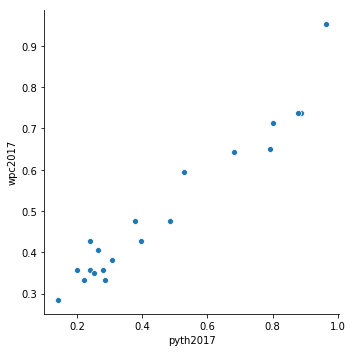

In [35]:
#Plot the data
sns.relplot(x="pyth2017", y="wpc2017", data = Games)

In [37]:
#Run the regression

pyth_lm = smf.ols(formula = 'wpc2017 ~ pyth2017', data = Games).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                wpc2017   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.81e-12
Time:                        05:17:20   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
pyth2017       0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Optional steps, not required for Assessment
### (Uncomment to run)

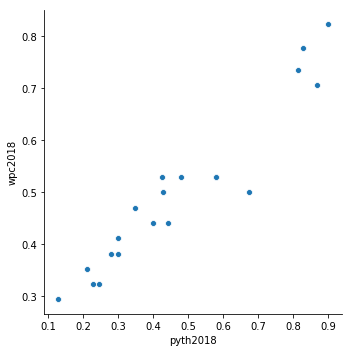

In [38]:
#Plot the data
sns.relplot(x="pyth2018", y="wpc2018", data = Games)

In [39]:
#Run the regression

pyth_lm = smf.ols(formula = 'wpc2018 ~ pyth2018', data = Games).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                wpc2018   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Fri, 12 May 2023   Prob (F-statistic):           5.02e-11
Time:                        05:18:47   Log-Likelihood:                 34.030
No. Observations:                  20   AIC:                            -64.06
Df Residuals:                      18   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2040      0.024      8.586      0.000       0.154       0.254
pyth2018       0.6237      0.045     13.823      0.000       0.529       0.718
==============================================================================
Omnibus:                        5.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.933
Skew:                          -0.826   Prob(JB):                        0.231
Kurtosis:                       3.890   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Optional steps, not required for Assessment
### (Uncomment to run)

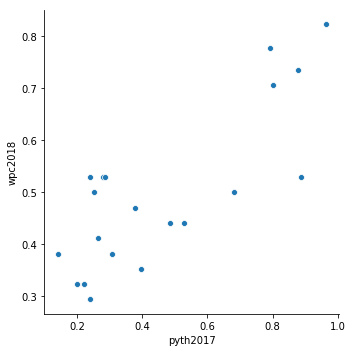

In [40]:
sns.relplot(x="pyth2017", y="wpc2018", data = Games)

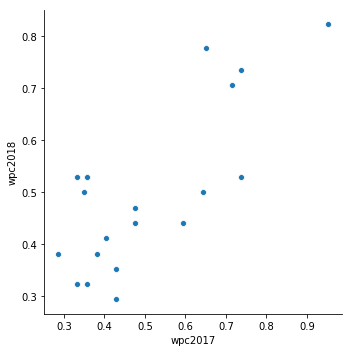

In [41]:
sns.relplot(x="wpc2017", y="wpc2018", data = Games)

Now you have completed the assignment, are these results consistent with those we found for Major League Baseball?